<a href="https://colab.research.google.com/github/Akfotty7/Akfotty7/blob/main/irrigationsystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import time

class IrrigationSystem:
    def __init__(self, field_size):
        self.field_size = field_size
        self.soil_moisture = random.uniform(30, 70)  # Initial soil moisture level
        self.weather_conditions = {"rain": False, "temperature": 25}

    def measure_soil_moisture(self):
        # Simulating soil moisture measurement
        self.soil_moisture = random.uniform(20, 80)

    def get_weather_conditions(self):
        # Simulating weather conditions
        self.weather_conditions["rain"] = random.choice([True, False])
        self.weather_conditions["temperature"] = random.uniform(20, 35)

    def decide_irrigation(self):
        # Simple rule-based decision: irrigate if soil moisture is below 40%
        if self.soil_moisture < 40:
            return True
        else:
            return False

    def irrigate(self):
        print("Irrigating the field...")
        # Simulating irrigation process
        time.sleep(2)
        print("Irrigation completed.")

    def evaluate_performance(self):
        # Evaluate the system's performance (for demonstration purposes)
        if self.soil_moisture > 50:
            print("Performance: Good")
        elif self.soil_moisture > 30:
            print("Performance: Moderate")
        else:
            print("Performance: Poor")

    def run(self, days):
        for day in range(1, days + 1):
            print(f"\nDay {day}")
            self.measure_soil_moisture()
            self.get_weather_conditions()

            if self.decide_irrigation():
                self.irrigate()

            self.evaluate_performance()

            # Simulating a day passing
            time.sleep(1)

if __name__ == "__main__":
    field_size = "small"  # You can change this to "medium" or "large" based on your field size
    irrigation_system = IrrigationSystem(field_size)
    irrigation_system.run(days=7)  # Simulate the system's operation for 7 days



Day 1
Irrigating the field...
Irrigation completed.
Performance: Moderate

Day 2
Performance: Good

Day 3
Irrigating the field...
Irrigation completed.
Performance: Poor

Day 4
Performance: Good

Day 5
Performance: Good

Day 6
Performance: Good

Day 7
Performance: Good


In [14]:
import pandas as pd
import pandas as np
import math
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
data=pd.read_csv("/content/rainfall.csv")
print("Data heads:")
print(data.head())
print("Null values in the dataset before preprocessing:")
print(data.isnull().sum())
print("Filling null values with mean of that particular column")
data=data.fillna(np.mean(data))
print("Mean of data:")
print(np.mean(data))
print("Null values in the dataset after preprocessing:")
print(data.isnull().sum())


Data heads:
                 SUBDIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0  ANDAMAN & NICOBAR ISLANDS  1901  49.2   87.1  29.2    2.3  528.8  517.5   
1  ANDAMAN & NICOBAR ISLANDS  1902   0.0  159.8  12.2    0.0  446.1  537.1   
2  ANDAMAN & NICOBAR ISLANDS  1903  12.7  144.0   0.0    1.0  235.1  479.9   
3  ANDAMAN & NICOBAR ISLANDS  1904   9.4   14.7   0.0  202.4  304.5  495.1   
4  ANDAMAN & NICOBAR ISLANDS  1905   1.3    0.0   3.3   26.9  279.5  628.7   

     JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  Mar-May  \
0  365.1  481.1  332.6  388.5  558.2   33.6  3373.2    136.3    560.3   
1  228.9  753.7  666.2  197.2  359.0  160.5  3520.7    159.8    458.3   
2  728.4  326.7  339.0  181.2  284.4  225.0  2957.4    156.7    236.1   
3  502.0  160.1  820.4  222.2  308.7   40.1  3079.6     24.1    506.9   
4  368.7  330.5  297.0  260.7   25.4  344.7  2566.7      1.3    309.7   

   Jun-Sep  Oct-Dec  
0   1696.3    980.3  
1   2185.9    716.7  
2   1874.0    

AttributeError: ignored

In [8]:

print("Info:")
print(data.info())
print("Group by:")
data.groupby('SUBDIVISION').size()



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtype

SUBDIVISION
ANDAMAN & NICOBAR ISLANDS             110
ARUNACHAL PRADESH                      97
ASSAM & MEGHALAYA                     115
BIHAR                                 115
CHHATTISGARH                          115
COASTAL ANDHRA PRADESH                115
COASTAL KARNATAKA                     115
EAST MADHYA PRADESH                   115
EAST RAJASTHAN                        115
EAST UTTAR PRADESH                    115
GANGETIC WEST BENGAL                  115
GUJARAT REGION                        115
HARYANA DELHI & CHANDIGARH            115
HIMACHAL PRADESH                      115
JAMMU & KASHMIR                       115
JHARKHAND                             115
KERALA                                115
KONKAN & GOA                          115
LAKSHADWEEP                           114
MADHYA MAHARASHTRA                    115
MATATHWADA                            115
NAGA MANI MIZO TRIPURA                115
NORTH INTERIOR KARNATAKA              115
ORISSA                

Box Plot of annual rainfall data in years 1901-2015


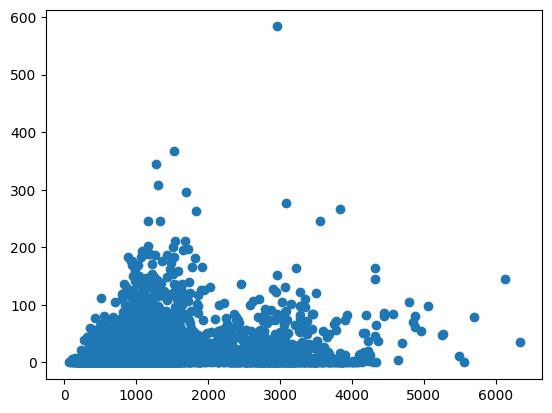

In [12]:

plt.scatter(data.ANNUAL,data.JAN)
print("Box Plot of annual rainfall data in years 1901-2015")



Histograms showing the data from attributes (JANUARY to DECEMBER) of the years 1901-2015:


<Axes: >

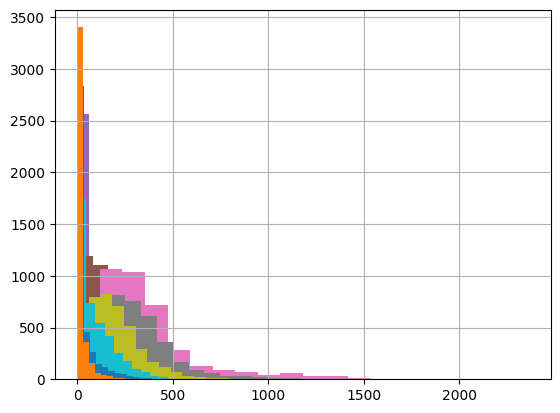

In [13]:
print("Histograms showing the data from attributes (JANUARY to DECEMBER) of the years 1901-2015:")
data['JAN'].hist(bins=20)
data['FEB'].hist(bins=20)
data['MAR'].hist(bins=20)
data['APR'].hist(bins=20)
data['MAY'].hist(bins=20)
data['JUN'].hist(bins=20)
data['JUL'].hist(bins=20)
data['AUG'].hist(bins=20)
data['SEP'].hist(bins=20)
data['OCT'].hist(bins=20)
data['NOV'].hist(bins=20)
data['DEC'].hist(bins=20)